In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pickleFile = open("data.pkl","rb")
obj = pd.read_pickle(pickleFile)
#obj

In [ ]:
x1_train = obj["train"]["x1"]
x2_train = obj["train"]["x2"]
y_train = obj["train"]["y"]

x1_test = obj["test"]["x1"]
x2_test = obj["test"]["x2"]
y_test = obj["test"]["ytest"]

x1lab = "living area"
x2lab = "year built"
ylab = "selling price"

In [ ]:
train_data = {x1lab: x1_train, x2lab: x2_train, ylab: y_train}
print(pd.DataFrame(train_data))

     living area  year built  selling price
0           1792        2001         231500
1           2192        1939         179500
2            900        1967         122000
3            630        1970          84500
4           1188        1959         142000
..           ...         ...            ...
495          804        1940         119000
496         1734        1962         159000
497          882        1959         106500
498         1339        1990         180000
499         1498        2006         204900

[500 rows x 3 columns]


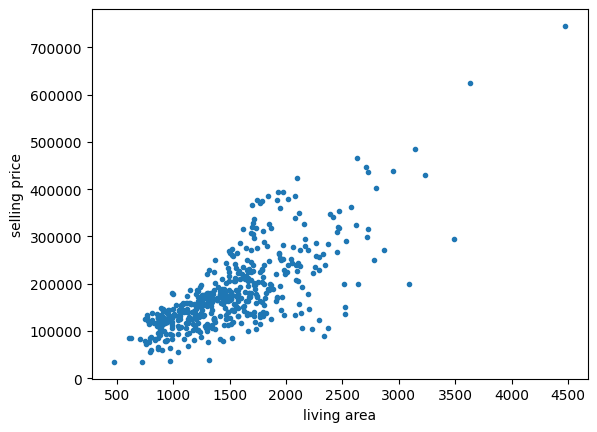

In [ ]:
#living area vs selling price (training data)

plt.scatter(x1_train, y_train, marker='.')
plt.xlabel(x1lab)
plt.ylabel(ylab)
plt.show()

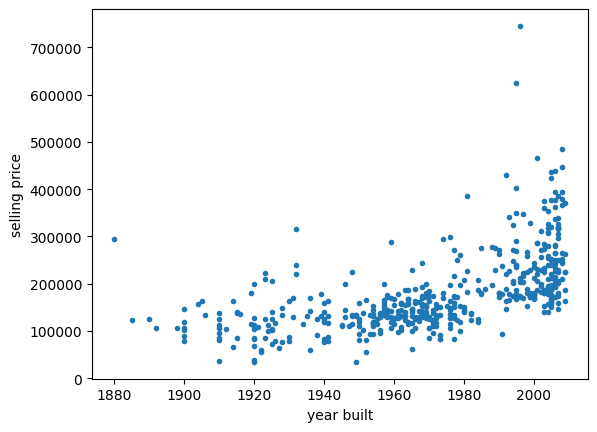

In [ ]:
#year built vs selling price (training data)

plt.scatter(x2_train, y_train, marker='.')
plt.xlabel(x2lab)
plt.ylabel(ylab)
plt.show()

## Polynomial Regression

### Univariate Polynomial Regression

In [ ]:
def predict(w, X1):
    return w[0] + w[1]*X1 + w[2]*X1**2

def univariatePolynomialRegression(X_train, X_test):
    m = len(y_train)

    X = np.ones((len(y_train), 3))
    X[:, 1] = X_train
    X[:, 2] = X_train**2
    Y = y_train

    w = np.linalg.pinv(X.T @ X) @ X.T @ Y

    x_range = np.linspace(min(X_test), max(X_test), m)
    Y_pred = predict(w, x_range)

    pred_error = np.sqrt((1/m)*(np.sum((np.subtract(Y_pred, y_test))**2)))
    print("Error:", pred_error)

    # Plotting
    plt.figure(figsize=(8, 7))

    # Plot actual data points
    plt.scatter(X_test, y_test, color='r', marker='.', label='Actual Data')

    # Plot regression curve
    plt.plot(x_range, Y_pred, color='b', label='Regression Curve')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Simple Quadratic Regression Plot')
    plt.show()

Error: 158406.4494969441


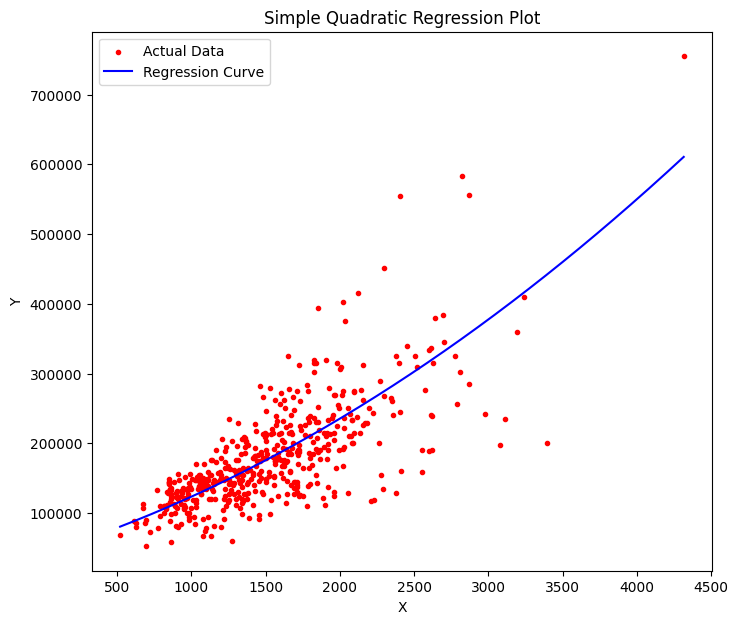

In [ ]:
univariatePolynomialRegression(x1_train, x1_test)

Error: 59482.191800385735


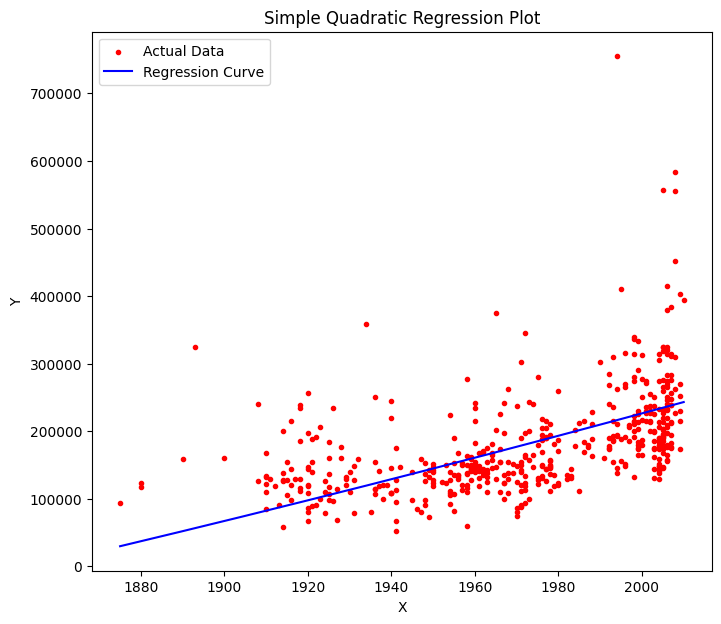

In [ ]:
univariatePolynomialRegression(x2_train, x2_test)

### Multivariate Polynomial Regression

Error: 2980726.4350898303


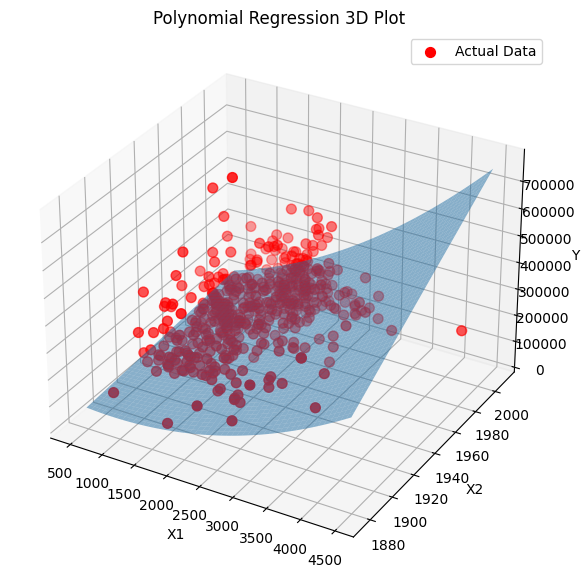

In [ ]:
def polynomial_regression(X1, X2, Y):
    m = len(Y)

    X = np.ones((m, 6))
    X[:, 1] = X1
    X[:, 2] = X2
    X[:, 3] = X1**2
    X[:, 4] = X2**2
    X[:, 5] = X1 * X2

    w = np.linalg.pinv(X.T @ X) @ X.T @ Y

    return w

def predict(w, X1, X2):
    return w[0] + w[1]*X1 + w[2]*X2 + w[3]*X1**2 + w[4]*X2**2 + w[5]*X1*X2


X1 = x1_train
X2 = x2_train
Y = y_train

coefficients = polynomial_regression(X1, X2, Y)

# Meshgrid for plotting
x1_range = np.linspace(min(X1), max(X1), 500)
x2_range = np.linspace(min(X2), max(X2), 500)
X1_range, X2_range = np.meshgrid(x1_range, x2_range)

# Predictions for each point on the meshgrid
Z = predict(coefficients, X1_range, X2_range)
n = len(y_test)
pred_error = np.sqrt((1/n)*(np.sum((np.subtract(Z, y_test))**2)))
print("Error:", pred_error)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(x1_test, x2_test, Y, color='r', s=50, label='Actual Data')

# Plot regression surface
ax.plot_surface(X1_range, X2_range, Z, alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

plt.title('Polynomial Regression 3D Plot')
plt.show()